<H1>Project 3 Data Exploration</H1><br>

In [1]:
import numpy as np
data = np.genfromtxt("diabetes2.csv", delimiter=',', skip_header=1, dtype=int)
data

array([[  6, 148,  72, ...,   0,  50,   1],
       [  1,  85,  66, ...,   0,  31,   0],
       [  8, 183,  64, ...,   0,  32,   1],
       ..., 
       [  5, 121,  72, ...,   0,  30,   0],
       [  1, 126,  60, ...,   0,  47,   1],
       [  1,  93,  70, ...,   0,  23,   0]])

In [2]:
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

In [3]:
df = pd.read_csv("diabetes2.csv") #Reading the dataset in a dataframe using Pandas
print df.head(5) 
df.describe()

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes= df.groupby(['class'])
diabetes.describe()

age                                                       insu  \
       count       mean        std   min   25%   50%   75%   max  count   
class                                                                     
0      500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0  500.0   
1      268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0  268.0   

                   ...   pres          skin                                  \
             mean  ...    75%    max  count       mean        std  min  25%   
class              ...                                                        
0       68.792000  ...   78.0  122.0  500.0  19.664000  14.889947  0.0  0.0   
1      100.335821  ...   82.0  114.0  268.0  22.164179  17.679711  0.0  0.0   

                         
        50%   75%   max  
class                    
0      21.0  31.0  60.0  
1      27.0  36.0  99.0  

[2 rows x 64 columns]

In [6]:
mass_des = df.groupby(['class'])
print mass_des.describe()

         age                                                       insu  \
       count       mean        std   min   25%   50%   75%   max  count   
class                                                                     
0      500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0  500.0   
1      268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0  268.0   

                   ...   pres          skin                                  \
             mean  ...    75%    max  count       mean        std  min  25%   
class              ...                                                        
0       68.792000  ...   78.0  122.0  500.0  19.664000  14.889947  0.0  0.0   
1      100.335821  ...   82.0  114.0  268.0  22.164179  17.679711  0.0  0.0   

                         
        50%   75%   max  
class                    
0      21.0  31.0  60.0  
1      27.0  36.0  99.0  

[2 rows x 64 columns]


In [7]:
df2 = df.copy(deep=True)
# use replace as pure function:
df2['plas']= df['plas'].replace(0,np.NaN)
df2['pres'] = df['pres'].replace(0,np.NaN)
df2['skin'] = df['skin'].replace(0,np.NaN)
df2['insu'] = df['insu'].replace(0,np.NaN)
# use replace as mutator by setting arg inplace=True 
df2['mass'].replace(0,np.NaN, inplace=True) 
print df2.apply(np.nanmedian, axis = 0)
df2.describe()

preg       3.0000
plas     117.0000
pres      72.0000
skin      29.0000
insu     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print "negative counts: " , df2['class'][df2['class']==0].count()
print "positive counts: " , df2['class'][df2['class']==1].count()

negative counts:  500
positive counts:  268


In [9]:
print df2.isnull().sum(axis=0)# sum along columns
nullPlas = df2.plas.isnull()# nullGest is array of boolean
countNullPlas = len(nullPlas[nullPlas==True])#take slice to count how many True
print countNullPlas
meanPlas = int(np.mean(df2.plas))    #Using numpy mean function to calculate the mean value
df2.plas = df2.plas.fillna(meanPlas) #replacing missing values in the DataFrame

preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64
5


In [10]:
nullPres = df2.pres.isnull()# nullGest is array of boolean
countNullPres = len(nullPres[nullPres==True])#take slice to count how many True
meanPres = int(np.mean(df2.pres))     #Using numpy mean function to calculate the mean value
df2.pres = df2.pres.fillna(meanPres) #replacing missing values in the DataFrame

In [11]:
nullSkin = df2.skin.isnull()# nullGest is array of boolean
countNullSkin = len(nullSkin[nullSkin==True])#take slice to count how many True
meanSkin = int(np.mean(df2.skin))     #Using numpy mean function to calculate the mean value
df2.skin = df2.skin.fillna(meanSkin) #replacing missing values in the DataFrame

In [12]:
nullInsu = df2.insu.isnull()# nullGest is array of boolean
countNullInsu = len(nullInsu[nullInsu==True])#take slice to count how many True
meanInsu = int(np.mean(df2.insu))     #Using numpy mean function to calculate the mean value
df2.insu = df2.insu.fillna(meanInsu) #replacing missing values in the DataFrame

In [13]:
nullMass = df2.mass.isnull()# nullGest is array of boolean
countNullMass = len(nullMass[nullMass==True])#take slice to count how many True
meanMass = np.mean(df2.mass)     #Using numpy mean function to calculate the mean value
df2.mass = df2.mass.fillna(meanMass) #replacing missing values in the DataFrame

In [14]:
%matplotlib inline

In [15]:
# Alternative to above: Fill in to impute all the columns at once
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 

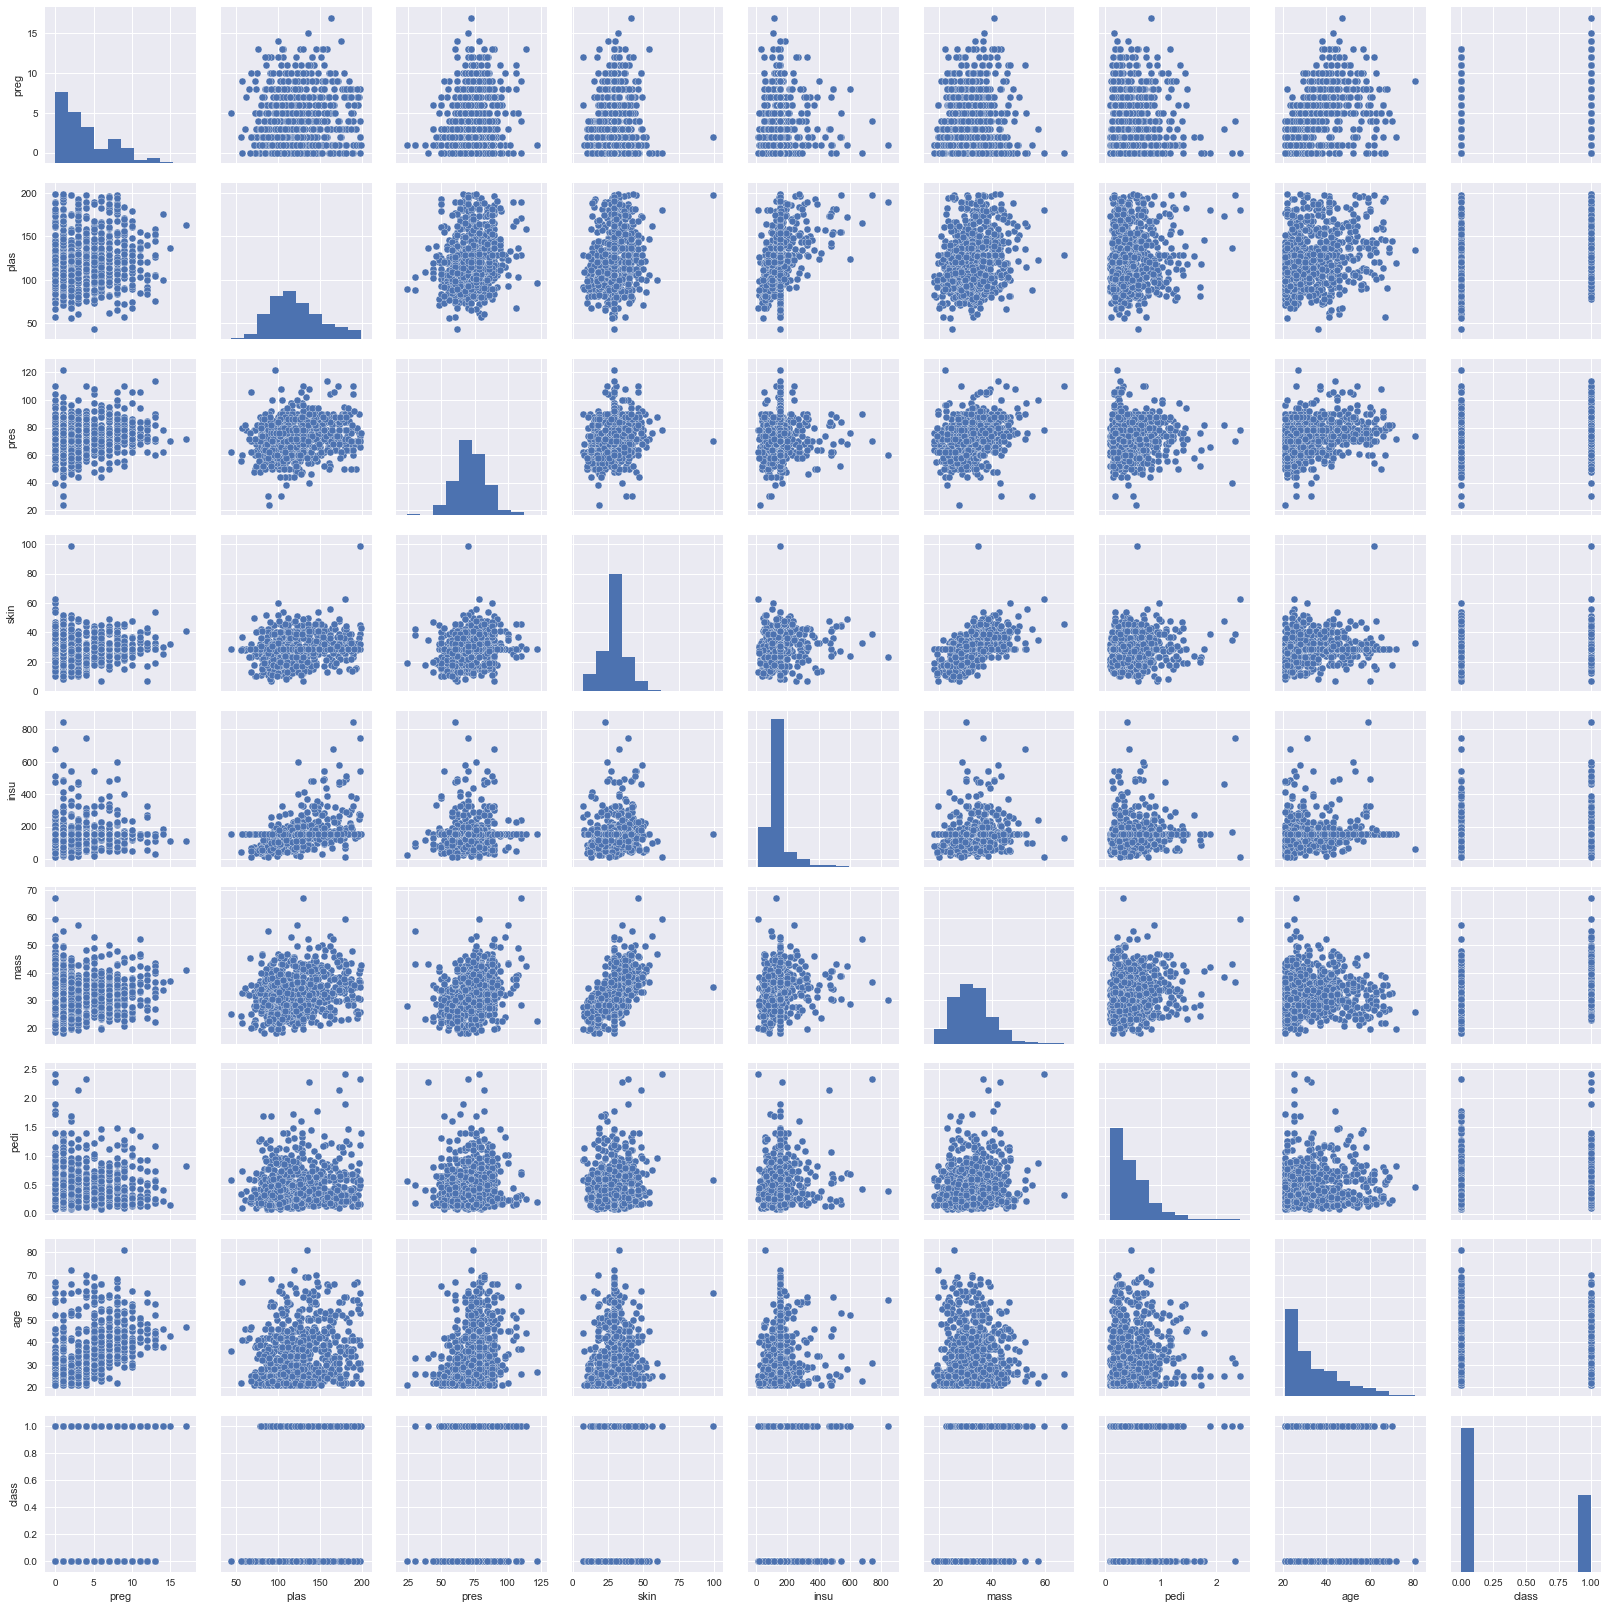

In [16]:
plot_df = df2.dropna()
sns.pairplot(plot_df)

<b>Use distplot() for a quick view of a univariate distribution.<br> 
By default, this will draw a histogram and fit a kernel density estimate (KDE).<br>
Notice the y axis can be counts or density of observations.</b><br>
See https://seaborn.pydata.org/tutorial/distributions.html

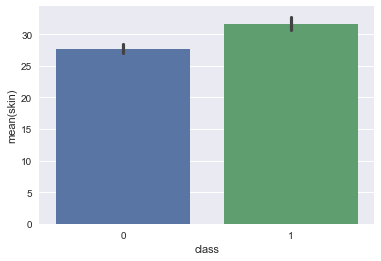

In [17]:
sns.barplot(x="class",   y="skin", data=plot_df)

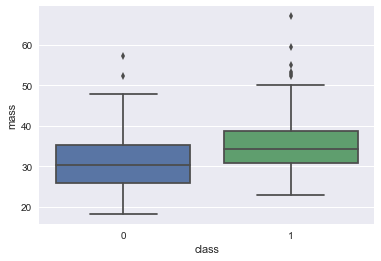

In [18]:
sns.boxplot(x="class", y="mass", data=plot_df)

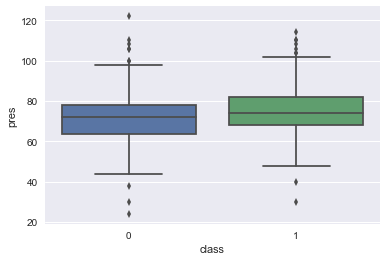

In [19]:
sns.boxplot(x="class", y="pres", data=plot_df)

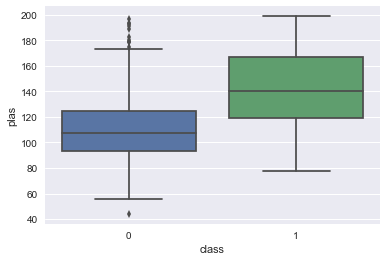

In [20]:
sns.boxplot(x="class", y="plas", data=plot_df)

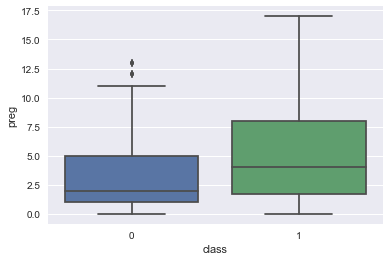

In [21]:
sns.boxplot(x="class", y="preg", data=plot_df)

<b> A quick view of the pair plot shows that 'skin' and 'mass' are positively correlated. But since skin has 30% missing data and we used the 'mean' method for imputing that feature, the density of data points around the mean of skin is higher in the graph.Therefore, in inputing we can drop 'skin' feature as we still have 'mass' feature<br> 

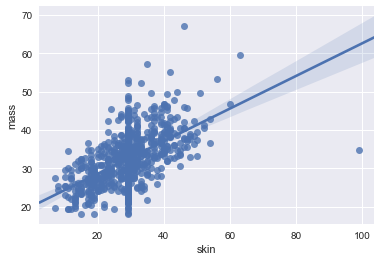

In [22]:
 sns.regplot(x="skin", y="mass", data=plot_df)  ###########################

([array([  51.,  135.,  131.,  108.,   50.,   22.,    2.,    1.,    0.,    0.]),
  array([  1.,  26.,  76.,  85.,  41.,  26.,   8.,   3.,   1.,   1.])],
 array([ 18.2 ,  23.09,  27.98,  32.87,  37.76,  42.65,  47.54,  52.43,
         57.32,  62.21,  67.1 ]),
 <a list of 2 Lists of Patches objects>)

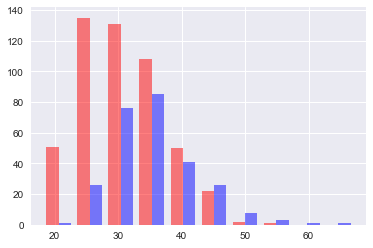

In [23]:
plt.hist([df2["mass"][df2['class']==0],df2["mass"][df2['class']==1]], color=['r','b'], alpha=0.5)

([array([  53.,  109.,  254.,   64.,   17.,    3.,    0.,    0.,    0.,    0.]),
  array([   6.,   32.,  154.,   54.,   19.,    1.,    1.,    0.,    0.,    1.])],
 array([  7. ,  16.2,  25.4,  34.6,  43.8,  53. ,  62.2,  71.4,  80.6,
         89.8,  99. ]),
 <a list of 2 Lists of Patches objects>)

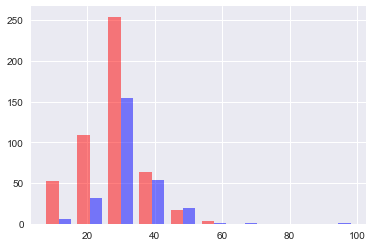

In [24]:
plt.hist([df2["skin"][df2['class']==0],df2["skin"][df2['class']==1]], color=['r','b'], alpha=0.5)

<b> Another set of correlated features are 'plas' and 'insu' but not as strong as 'skin' and 'mass'. But since insu has 49% missing data and we used the 'mean' method for imputing that feature, the density of data points around the mean of insu is higher in the graph. Therefore, in inputing we can drop 'insu' feature as we still have 'plas' feature<br> 

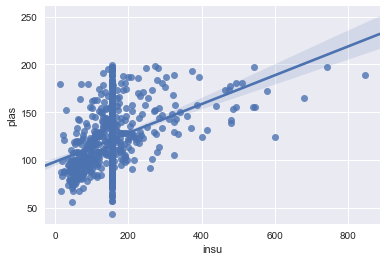

In [25]:
 sns.regplot(x="insu", y="plas", data=plot_df)  ###########################

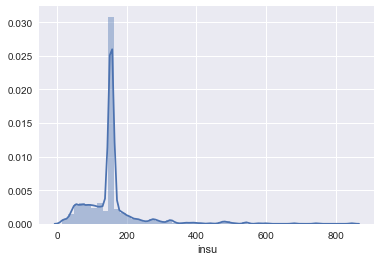

In [26]:
sns.distplot(df2.insu)

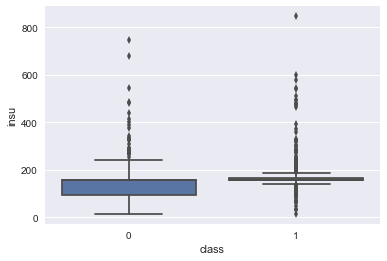

In [27]:
sns.boxplot(x="class", y="insu", data=plot_df)

<b> A quick view of the 2-hour glucose tolerance test shows that individulas with a plasma more than "140" have significantly higher risk of diabetes.<br> 

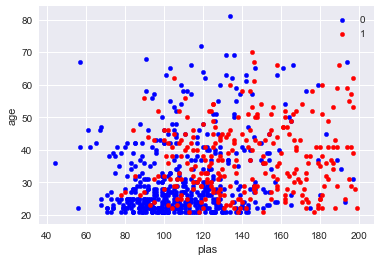

In [28]:
fig, ax = plt.subplots()
colors ={1:'red', 0:'blue'}
grouped = plot_df.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='plas', y='age', label=key, color=colors[key])
plt.show()

([array([   4.,   19.,   80.,  126.,  121.,   74.,   45.,   20.,    6.,    5.]),
  array([  0.,   0.,   7.,  23.,  45.,  51.,  43.,  34.,  38.,  27.])],
 array([  44. ,   59.5,   75. ,   90.5,  106. ,  121.5,  137. ,  152.5,
         168. ,  183.5,  199. ]),
 <a list of 2 Lists of Patches objects>)

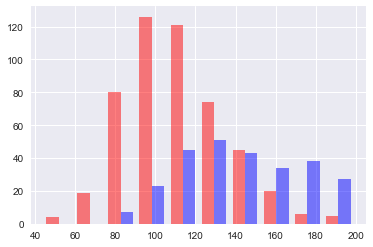

In [29]:
#df2["class"][df2['class']==0]
plt.hist([plot_df["plas"][plot_df['class']==0],plot_df["plas"][plot_df['class']==1]], color=['r','b'], alpha=0.5)

<b> A quick view of the age factor shows that individulas between the age of 40 to 55 have higher risk of diabetes.<br> 

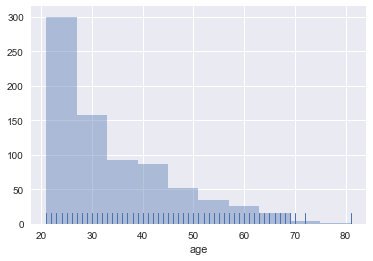

In [30]:
sns.distplot(df2.age, bins= 10, kde=False, rug=True)

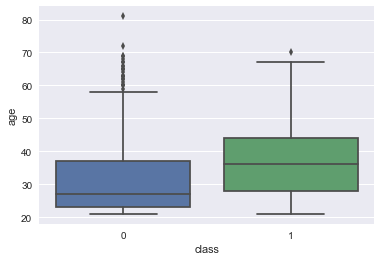

In [31]:
sns.boxplot(x="class", y="age", data=plot_df)

([array([ 188.,  124.,   50.,   39.,   32.,   21.,   10.,   13.,   11.,   10.]),
  array([ 31.,  53.,  42.,  34.,  42.,  23.,  25.,   9.,   5.,   4.])],
 array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]),
 <a list of 2 Lists of Patches objects>)

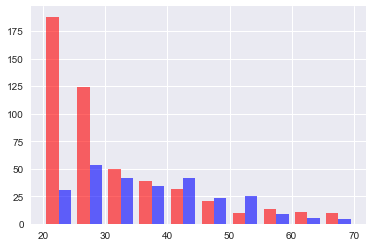

In [32]:
plt.hist([plot_df["age"][plot_df['class']==0],plot_df["age"][plot_df['class']==1]], color=['r','b'], alpha=0.6, 
         bins =[20,25,30,35,40,45,50,55,60,65,70])